In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../cleaned_2011.csv')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,emp__8 years,emp__9 years,emp__< 1 year,ho__MORTGAGE,ho__OTHER,ho__OWN,ho__RENT,ver__Not Verified,ver__Source Verified,ver__Verified
0,5000,5000,4975.0,10.65,162.87,24000.0,Fully Paid,27.65,0,1,...,0,0,0,0,0,0,1,0,0,1
1,2500,2500,2500.0,15.27,59.83,30000.0,Charged Off,1.00,0,5,...,0,0,1,0,0,0,1,0,1,0
2,2400,2400,2400.0,15.96,84.33,12252.0,Fully Paid,8.72,0,2,...,0,0,0,0,0,0,1,1,0,0
3,10000,10000,10000.0,13.49,339.31,49200.0,Fully Paid,20.00,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3000,3000,3000.0,12.69,67.79,80000.0,Current,17.94,0,0,...,0,0,0,0,0,0,1,0,1,0


In [3]:
df['loan_status'].value_counts()

Fully Paid            16470
Charged Off            3205
Current                1953
Late (31-120 days)       46
In Grace Period          28
Late (16-30 days)        11
Default                   8
Name: loan_status, dtype: int64

In [4]:
df['loan_status'] = df['loan_status'].replace({'Fully Paid': 1})
df['loan_status'] = df['loan_status'].replace({'Charged Off': 0})
df['loan_status'] = df['loan_status'].replace({'Current': 1})
df['loan_status'] = df['loan_status'].replace({'Late (31-120 days)': 0})
df['loan_status'] = df['loan_status'].replace({'In Grace Period': 0})
df['loan_status'] = df['loan_status'].replace({'Late (16-30 days)': 0})
df['loan_status'] = df['loan_status'].replace({'Default': 0})

In [5]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'term_ 60 months', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'emp__1 year',
       'emp__10+ years', 'emp__2 years', 'emp__3 years', 'emp__4 years',
       'emp__5 years', 'emp__6 years', 'emp__7 years', 'emp__8 years',
       'emp__9 years', 'emp__< 1 year', 'ho__MORTGAGE', 'ho__OTHER', 'ho__OWN',
       'ho__RENT', 'ver__Not Verified', 'ver__Source Verified',
       'ver__Ve

In [6]:
labels = df[['loan_status']]
data = df[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti',
           'delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec',
          'revol_bal','revol_util','total_acc','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
           'total_rec_int']]


In [7]:
train_data,test_data,train_labels,test_labels = train_test_split(data,labels,random_state=1)

# Decision Tree Model

In [8]:
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(train_data,train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [9]:
score = tree.score(test_data,test_labels)
score

0.9821395691401216

# Random Forest Model

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2000)
rf.fit(train_data,train_labels.values.ravel())
rf.score(test_data, test_labels)

0.9845332351316516

In [28]:
sorted(zip(rf.feature_importances_, data.columns), reverse=True)


[(0.3140776511518873, 'total_rec_prncp'),
 (0.12273582856863391, 'total_pymnt'),
 (0.11990685323632555, 'total_pymnt_inv'),
 (0.0835333356864245, 'funded_amnt_inv'),
 (0.07881224146038618, 'funded_amnt'),
 (0.07306553114838428, 'loan_amnt'),
 (0.06829674955961916, 'installment'),
 (0.038158275399001004, 'total_rec_int'),
 (0.023268548402273843, 'int_rate'),
 (0.014749227757045943, 'out_prncp_inv'),
 (0.010558579781211734, 'revol_util'),
 (0.010182782443248257, 'annual_inc'),
 (0.009475123450622897, 'revol_bal'),
 (0.009222081813904184, 'dti'),
 (0.007137828047083683, 'total_acc'),
 (0.005590530976786084, 'open_acc'),
 (0.004032428620826008, 'mths_since_last_delinq'),
 (0.0032258398080651607, 'inq_last_6mths'),
 (0.001787390667583124, 'mths_since_last_record'),
 (0.0014044081085448346, 'delinq_2yrs'),
 (0.0007787639121424217, 'pub_rec')]

In [39]:
descscores = sorted(rf.feature_importances_,reverse=True)
desclabels = ['total_rec_prncp','total_pymnt','total_pymnt_inv','funded_amnt_inv','funded_amnt',
             'loan_amnt','installment','total_rec_int','int_rate','out_prncp_inv','revol_util','annual_inc',
             'revol_bal','dti','total_acc','open_acc','mths_since_last_delinq','inq_last_6mths','mths_since_last_record',
             'delinq_2yrs','pub_rec']

From testing this model, we discovered the features that were most determinant of the status of the loan. We can see that features regarding the total principal and payment are largely going to affect whether a loan is going to be a good or bad one. 

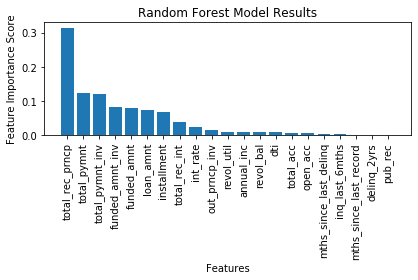

In [40]:

plt.bar(desclabels,descscores,align='center')

plt.xlabel("Features")
plt.ylabel("Feature Importance Score")
plt.title("Random Forest Model Results")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

